#MA5851 - Webcrawler and NLP System Document 2


## Aim

To analyse the headline and descriptions gathered daily from Australian digital media sites, identifying underlying topics and sentiments and current trends in order to assess potential impacts to general mental health and wellbeing such as increased anxiety or the increased potential for anger or violence though exposure to digital media sources.


## Overview

  News accessibility has shifted towards digital access, not only directly through dedicated news sites, but through social media, a study by Vermeer, Trilling, Kirriemuir and de Vreese found that users tended to have a favourite media site and would generally browse articles within that same outlet. The competition for ‘clicks’ has increased, with journalists needing to craft informative but enticing headlines to encourage a user to follow the link into the story, through Natural Language Processing analysis more data driven insights are available to media outlets to formulate headlines that will encourage user interaction (Jaimes, Kim, Mantrach, & Oh, 2016).  
  
  Mental health of a reader can be influenced by the headlines they are presented, responses such as fear, anxiety, depression and anger can be triggered as an emotional response (Aslam, Awan, Kashif, Parveen, & Syed, 2020), the way information is presented, from the actual words used and the contextual setting can be analysed through the implementation of NLP and Machine Learning. This protype seeks to analyse a single day’s headlines and article descriptions, seeking to expose topics and sentiments which could be used as a starting point to evolve a mental health alert system for highly emotive news articles that may impact the general mental health and wellbeing of Australian news followers.


# Environment Setup

In [ ]:
#Import Libraries
import requests
from bs4 import BeautifulSoup
from time import sleep
from google.colab import drive
drive.mount('/content/drive')
import csv
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords
from operator import itemgetter
import math
from nltk.tokenize import word_tokenize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Collection from Websites

In [ ]:
#creating the empty variable to hold the weblinks
article_soup=[]


## Domains 

The domains selected are 5 digital access newspapers in the Nine Entertainment Co Pty Ltd network, along with the ABC News website, these websites were selected as there were no paywall limitations on accessing the underlying articles, which would allow for further expansion of the prototype, and are representative of news being presented to Australians in 4 states, as well as two national websites. 

## Website URLS

The 6 website urls selected are:

https://theage.com.au, https://www.smh.com.au, https://www.afr.com/, https://www.watoday.com.au/, https://www.brisbanetimes.com.au/, https://www.abc.net.au/news

Each of the selected websites contains a range of news headlines and short descriptions about the underlying article, which is accessible via a link, some articles also have an image which has been ignored for the purpose of this project. The topics covered range from news of the day, politics, through to travel, food, and drive reviews. All digitised papers contain both national and state-based articles, whereas ABC news is national news.

News editors and journalists seek to ensure their article goes viral, generally, negatively skewed language is more popular with readers generating more “clicks” than neutral or positive titles (Dimitrova, Markert, Otterbacher, & Piotrkowicz, 2017). The selected news sources are representative of Australian news sites that are reliant on web traffic and readers being enticed by the presented headlines and descriptions to explore multiple articles generating both advertising income and encouraging readers to take out digital subscriptions in order to have unlimited access to articles. 


## Meta Data 

Each website is structured in a similar way, with the article title and link to the underlying article stored under the 'H3' tag, this information was extracted from each website using the web scraping tool Beautiful Soup from Python and the article title and link were stored in a list for later use.

## Website/data copyright considerations
Even though digitised media content on these pages are protected under copyright, this is an academic exercise and, as such, scraping article headlines and descriptions does not violate copyright laws.


## Methodology
This project has been created using Python version 3.6.9 via Google Collab. The methodology is as follows:


*   Scrape newspaper headlines and descriptions from Australian based news sites.
*  Investigate collected data including count distributions of collected data, frequently used words, and number of articles from each site and spread of ‘sections’. 
*   Clean and pre-process the collected data for use with NLP tasks.
*   Preliminary findings from the exploration of the data.
*   Topic Modelling and Sentiment analysis using LDA and Vader, along with a classification tree to assess the accuracy of the Sentiment analysis


## Webscraper

  The data from the news sites is complicated due to the nature of the information presented, there is text, embedded images and video along with advertising and various puzzles. After several failed attempts to implement Selenium and facing into a java detection issue, it was decided to use Beautiful Soup to parse the HTML code of each page and extract the title(headline) and the 'href' information that is a link to the full article. There is no interaction with the website beyond the collection of data which was stored in a list to retrieve description and section information. Beautiful soup works by creating a parse tree from accessed pages using specific criteria to search, navigate, extract, and modify data from HTML (Bruess, 2021).

  The scraping is done in two parts, the first pass examines the landing page for each of the news sites and extracts the ‘href’ information and adding it to the website link and storing it in a list. The following code was used to complete part 1 of the webscraping, Figure 2 below is an example of the HTML code visualised using the soup.prettify() command.


In [ ]:
# defining the code to retrieve todays news from several papers

def retrieve_soup(url):

   #Specify with which web page you are going to be scraping
   page = requests.get(url)

   #Parse the HTML into the BeautifulSoup parse tree format
   soup = BeautifulSoup(page.content, 'lxml')
   print(soup.prettify())
   #To get the title of the page
   titles = soup.select('h3')
   for items in titles:
     article_name = items.get_text()
  
     links = items.find_all("a")
    
     for link in links:
         link_url = link["href"] 
     try:     
      if link_url.find("http")==-1:
           link_url=url+link_url
           print(link_url)
           article_soup.append(link_url)
      else:
           print("No article")
     except (NameError):
       print("No article")


In [ ]:
newssites=["https://theage.com.au", "https://www.smh.com.au", 'https://www.afr.com/', 'https://www.watoday.com.au/', 'https://www.brisbanetimes.com.au/']

for link in newssites:
  print(link)
  details=retrieve_soup(link)
print(article_soup)  

Streaming output truncated to the last 5000 lines.
          Sport
         </a>
        </li>
       </ul>
      </nav>
     </div>
    </div>
   </header>
   <div class="_3ic7p printOnly">
    <div class="_3uPYr _2qnYw">
     <a class="_2ABN- YClUs" href="/">
      <h2>
       The Sydney Morning Herald
      </h2>
     </a>
    </div>
   </div>
   <div aria-hidden="true" class="_2yAUQ" data-testid="site-menu" id="navigation">
    <button class="_2dmHA">
     close
    </button>
    <form class="_3b67L">
     <label for="site-search">
      Search Site
     </label>
     <input class="_2q19s" id="site-search" name="query" placeholder="Search" type="search" value=""/>
     <input class="JaNbC" type="submit" value="Search"/>
    </form>
    <ul class="_2fq7t" role="tablist">
     <li class="rGXdz" role="presentation">
      <a aria-controls="sections" aria-selected="true" href="#sections" id="navSections" role="tab" tabindex="0">
       Sections
      </a>
     </li>
     <li class="" r

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Retrieving ABC News separately due to different handling of URLS

In [ ]:

#Specify with which web page you are going to be scraping
page_abc = requests.get('https://www.abc.net.au/news')

#Parse the HTML into the BeautifulSoup parse tree format
soup_abc = BeautifulSoup(page_abc.content, 'lxml')

print(soup_abc.prettify())


<!DOCTYPE html>
<html data-react-hydrated="false" lang="en-AU">
 <head>
  <title data-react-helmet="true">
   ABC News (Australian Broadcasting Corporation)
  </title>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1.0" data-react-helmet="true" name="viewport"/>
  <meta content="ie=edge" data-react-helmet="true" http-equiv="x-ua-compatible"/>
  <meta content="ABC News (Australian Broadcasting Corporation)" data-react-helmet="true" name="title"/>
  <meta content="Trusted and independent source of local, national and world news. In-depth analysis, business, sport, weather and more." data-react-helmet="true" name="description"/>
  <meta content="Channel" data-react-helmet="true" property="ABC.ContentType"/>
  <meta content="coremedia" data-react-helmet="true" property="ABC.ContentSource"/>
  <meta content="PL NEWS WEB" data-react-helmet="true" name="generator"/>
  <meta content="PL NEWS WEB" data-react-helmet="true" property="ABC.Gene

In [ ]:
#To get the title of the page
titles = soup_abc.select('h3')

for items in titles:
 
  article_name = items.get_text()
  links = items.find_all("a")
  
  for link in links:
      link_url = link["href"] 
      
  
  try:
    if link_url.find("http")==-1:
        link_url="https://abc.net.au"+link_url
        print(link_url)
        article_soup.append(link_url)
    else:
       print("No article")
  except (NameError):
       print("No article")
print(article_soup)


No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
No article
https://abc.net.au/news/2021-12-08/why-wests-tigers-turned-down-brandon-smith/100682412
https://abc.net.au/news/2021-12-08/amazon-cloud-outage-hits-major-websites-streaming-apps/100682378
https://abc.net.au/news/2021-12-08/evergrande-default-debt-developers-china/100682242
https://abc.net.au/news/2021-12-08/qld-coronavirus-covid-omicron-variant/100682280
https://abc.net.au/news/2021-12-08/push-for-stricter-coal-ash-clean-up-requirements-latrobe-valley/100676900
https://abc.net.au/news/2021-12-08/liverpool-ajax-champions-league-history-group-stage-winds-down/100682120
https://abc.net.au/news/2021-12-08/corona

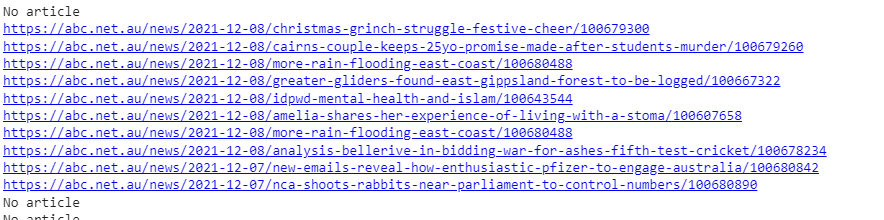

Figure 3 Sample of the extracted URL's from parsing the ABC News website

The second part then visits each of the stored links (as shown in Figure 3 above) and retrieves the title, description, the section (where available) from the article link and storing it in a list before the information is exported to a csv file.

In [ ]:
def get_article_info(url_link):
  try:
    page2 = requests.get(url_link)
    soup2 = BeautifulSoup(page2.content, 'html.parser')
    #print(soup2)
    sleep(0.5)
    content_descript = soup2.find("meta", property="og:description", content=True)
    
    content_title = soup2.find("meta", property="og:title", content=True)
    
    meta_content=soup2.find_all("meta")
    description=content_descript["content"]
    title = content_title["content"]
    
    section=""
    for tag in meta_content:
    
      if tag.get("name") == "parsely-tags":
          keywords = (tag.get("content"))
    
      if tag.get("name") == "parsely-section":
          section = (tag.get("content"))
      elif url_link.startswith('https://abc'):
          section = "Misc News"
    paper=url_link
    
    return{"Title": title, "Description": description, "Section": section, "Paper": paper} 
  except (NameError, ConnectionError, TypeError):
    return {"Title": "", "Description": "", "Section": "", "Paper": ""}

The ABC news site does not tag articles by sections in the same way as the other news sites, a specific tag of "Misc News" has been added to the retrieved ABC information for later use

In [ ]:
dataset = []
for url_link in article_soup:
  if url_link.find("www.domain")!=-1:
    print("Skipping Website Retrieval for: ", url_link)
  else:
    print("now retrieving", url_link)
    dataset.append(get_article_info(url_link))


now retrieving https://theage.com.au/newsletter-signup?newsletter=breaking-news
now retrieving https://theage.com.au/politics/federal/scott-morrison-confirms-australia-s-diplomatic-boycott-of-beijing-olympics-20211208-p59frw.html
now retrieving https://theage.com.au/national/victoria/desperate-triple-zero-calls-unanswered-as-a-life-ticked-away-20211206-p59fbr.html
now retrieving https://theage.com.au/national/australia-news-live-nsw-s-omicron-covid-cluster-grows-first-ashes-test-due-to-begin-in-brisbane-20211207-p59fl5.html
now retrieving https://theage.com.au/sport/cricket/ashes-2021-22-first-test-live-updates-broad-set-to-be-left-out-of-england-xi-20211207-p59fiu.html
now retrieving https://theage.com.au/sport/cricket/ashes-2021-22-first-test-live-updates-broad-set-to-be-left-out-of-england-xi-20211207-p59fiu.html
now retrieving https://theage.com.au/sport/cricket/from-high-school-sporty-geek-to-test-captain-the-rise-of-pat-cummins-20211109-p5977v.html
now retrieving https://theage.c

In [ ]:

keys = dataset[0].keys()

with open('/content/drive/My Drive/Assessment_3/dataset.csv', 'w', newline='', encoding='utf8') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(dataset)



# Harvested Corpus EDA


## Viewing Scraped Data

Once the scraper had collected all the data, the information was saved to a .csv file. Table 1 shows the resulting dataset comprised over 576 records of 4 columns containing the Title, Description, Section and Paper information. Data was collected at 7.15am 8th December 2021.

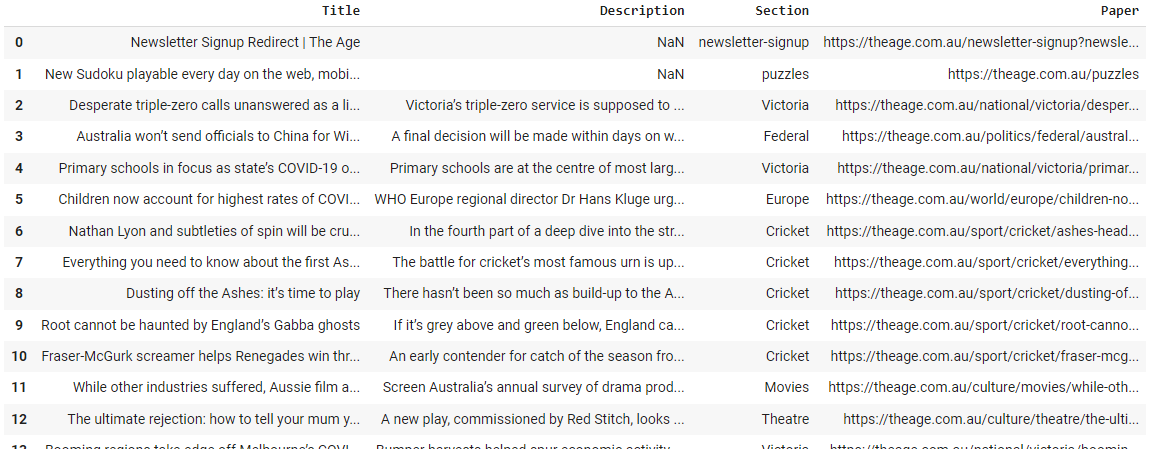
Table 1 Table of extracted news information

In [ ]:
#Importing the dataset
df = pd.read_csv("/content/drive/My Drive/Assessment_3/dataset.csv")
print(df.info)
df.head(15)

<bound method DataFrame.info of                                                  Title  ...                                              Paper
0                 Newsletter Signup Redirect | The Age  ...  https://theage.com.au/newsletter-signup?newsle...
1    Scott Morrison confirms Australia’s diplomatic...  ...  https://theage.com.au/politics/federal/scott-m...
2    Desperate triple-zero calls unanswered as a li...  ...  https://theage.com.au/national/victoria/desper...
3    Australia news LIVE: NSW’s Omicron COVID clust...  ...  https://theage.com.au/national/australia-news-...
4    Ashes 2021/22 first Test LIVE updates: Root di...  ...  https://theage.com.au/sport/cricket/ashes-2021...
..                                                 ...  ...                                                ...
522  When Laura's father died, the NDIA told her 86...  ...  https://abc.net.au/news/2021-12-08/father-of-s...
523  On the upside the drought map is finally clear...  ...  https://abc.net.au/

,Title,Description,Section,Paper
0,Newsletter Signup Redirect | The Age,NaN,newsletter-signup,https://theage.com.au/newsletter-signup?newsle...
1,Scott Morrison confirms Australia’s diplomatic...,The Prime Minister has confirmed Australia wil...,Federal,https://theage.com.au/politics/federal/scott-m...
2,Desperate triple-zero calls unanswered as a li...,Victoria’s triple-zero service is supposed to ...,Victoria,https://theage.com.au/national/victoria/desper...
3,Australia news LIVE: NSW’s Omicron COVID clust...,Another Liberal elder has encouraged Gladys Be...,National,https://theage.com.au/national/australia-news-...
4,Ashes 2021/22 first Test LIVE updates: Root di...,Australia are off to a dream start at the Gabb...,Cricket,https://theage.com.au/sport/cricket/ashes-2021...
5,Ashes 2021/22 first Test LIVE updates: Root di...,Australia are off to a dream start at the Gabb...,Cricket,https://theage.com.au/sport/cricket/ashes-2021...
6,Not just another Alpha Male: How Pat Cummins w...,Life has never been all about cricket for Aust...,Cricket,https://theage.com.au/sport/cricket/from-high-...
7,Nathan Lyon and subtleties of spin will be cru...,In the fourth part of a deep dive into the str...,Cricket,https://theage.com.au/sport/cricket/ashes-head...
8,I don’t want to attend my work Christmas party...,If there has ever been a time to allow yoursel...,Life & relationships,https://theage.com.au/lifestyle/life-and-relat...
9,"A hospital drama bursts out of the blocks, and...",New Amsterdam took aim at America’s broken hea...,TV & radio,https://theage.com.au/culture/tv-and-radio/a-h...


##Data cleaning

There were several necessary steps involved in preparing the Tweet data for analysis using NLP methods. First, user handles were removed using a lambda function targeting the @ symbol before user handles. After this, the remaining punctuation, special characters were removed. Furthermore, a new column was generated with values ‘M’ or ‘F’, corresponding to male or female, depending on which pronouns were present in the original Tweet, and a final ‘Topic’ column containing the relevant STEM field.

The resulting dataframe contained 25,365 rows, with four columns containing the User Handle, the text of each Tweet, and the subject gender (Table 2). The dataframe was saved as a .csv file for later use.



In [ ]:
#Dropping duplicate rows from the dataset and creating the text for processing

print("The dataframe contains:" ,df.info())
df = df.drop_duplicates(subset ="Title",keep = "first", inplace = False)
df = df.dropna()

print(df)
print("The new dataframe contains:" ,df.info())

# function for text cleaning 
def clean_text(text):
   
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

#calling the text cleaning
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Description'] = df['Description'].apply(lambda x: clean_text(x))
df['Section'] = df['Section'].apply(lambda x: clean_text(x))

#creating a single field of Title and Description
df['Together']=df['Title']+df['Description']

Titles = df['Together'].str.cat(sep = '')
Titles

df = df.reset_index()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        527 non-null    object
 1   Description  518 non-null    object
 2   Section      527 non-null    object
 3   Paper        527 non-null    object
dtypes: object(4)
memory usage: 16.6+ KB
The dataframe contains: None
                                                 Title  ...                                              Paper
1    Scott Morrison confirms Australia’s diplomatic...  ...  https://theage.com.au/politics/federal/scott-m...
2    Desperate triple-zero calls unanswered as a li...  ...  https://theage.com.au/national/victoria/desper...
3    Australia news LIVE: NSW’s Omicron COVID clust...  ...  https://theage.com.au/national/australia-news-...
4    Ashes 2021/22 first Test LIVE updates: Root di...  ...  https://theage.com.au/sport/cricket/ashes-2021...
6    Not just another Alp

,index,Title,Description,Section,Paper,Together
0,1,scott morrison confirms australia s diplomatic...,the prime minister has confirmed australia wil...,federal,https://theage.com.au/politics/federal/scott-m...,scott morrison confirms australia s diplomatic...
1,2,desperate triple zero calls unanswered as a li...,victoria s triple zero service is supposed to ...,victoria,https://theage.com.au/national/victoria/desper...,desperate triple zero calls unanswered as a li...
2,3,australia news live nsw s omicron covid cluste...,another liberal elder has encouraged gladys be...,national,https://theage.com.au/national/australia-news-...,australia news live nsw s omicron covid cluste...
3,4,ashes first test live updates root dismissed f...,australia are off to a dream start at the gabb...,cricket,https://theage.com.au/sport/cricket/ashes-2021...,ashes first test live updates root dismissed f...
4,6,not just another alpha male how pat cummins wi...,life has never been all about cricket for aust...,cricket,https://theage.com.au/sport/cricket/from-high-...,not just another alpha male how pat cummins wi...
5,7,nathan lyon and subtleties of spin will be cru...,in the fourth part of a deep dive into the str...,cricket,https://theage.com.au/sport/cricket/ashes-head...,nathan lyon and subtleties of spin will be cru...
6,8,i don t want to attend my work christmas party...,if there has ever been a time to allow yoursel...,life relationships,https://theage.com.au/lifestyle/life-and-relat...,i don t want to attend my work christmas party...
7,9,a hospital drama bursts out of the blocks and ...,new amsterdam took aim at america s broken hea...,tv radio,https://theage.com.au/culture/tv-and-radio/a-h...,a hospital drama bursts out of the blocks and ...
8,10,from susan orlean comes a book about animals e...,the real subject of this book is human animals...,books,https://theage.com.au/culture/books/who-are-th...,from susan orlean comes a book about animals e...
9,11,liberal elder baird encourages berejiklian to ...,the concern is if the report that comes down i...,federal,https://theage.com.au/politics/federal/liberal...,liberal elder baird encourages berejiklian to ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to b

,index,Title,Description,Section,Paper,Together
0,1,scott morrison confirms australia s diplomatic...,the prime minister has confirmed australia wil...,federal,The Age,scott morrison confirms australia s diplomatic...
1,2,desperate triple zero calls unanswered as a li...,victoria s triple zero service is supposed to ...,state,The Age,desperate triple zero calls unanswered as a li...
2,3,australia news live nsw s omicron covid cluste...,another liberal elder has encouraged gladys be...,misc news,The Age,australia news live nsw s omicron covid cluste...
3,4,ashes first test live updates root dismissed f...,australia are off to a dream start at the gabb...,sport,The Age,ashes first test live updates root dismissed f...
4,6,not just another alpha male how pat cummins wi...,life has never been all about cricket for aust...,sport,The Age,not just another alpha male how pat cummins wi...
5,7,nathan lyon and subtleties of spin will be cru...,in the fourth part of a deep dive into the str...,sport,The Age,nathan lyon and subtleties of spin will be cru...
6,8,i don t want to attend my work christmas party...,if there has ever been a time to allow yoursel...,health wellness,The Age,i don t want to attend my work christmas party...
7,9,a hospital drama bursts out of the blocks and ...,new amsterdam took aim at america s broken hea...,entertainment,The Age,a hospital drama bursts out of the blocks and ...
8,10,from susan orlean comes a book about animals e...,the real subject of this book is human animals...,entertainment,The Age,from susan orlean comes a book about animals e...
9,11,liberal elder baird encourages berejiklian to ...,the concern is if the report that comes down i...,federal,The Age,liberal elder baird encourages berejiklian to ...


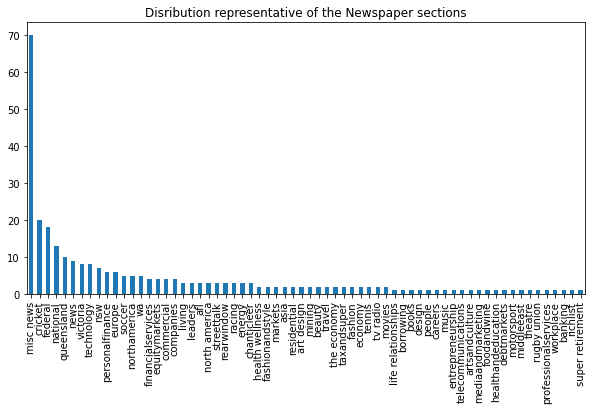

In [ ]:
## Distribution of news categories 
dist_plot = df['Section'].value_counts().plot(x = 'date', y ='count', kind = 'bar', title = "Disribution representative of the Newspaper sections", figsize = (10,5))


df['Section'] = df['Section'].replace({'basketball': 'sport', 'cricket': 'sport', 'afl': 'sport', 'tennis': 'sport', 'motorsport': 'sport',
                                       'soccer': 'sport', 'racing': 'sport', 'music': 'entertainment', 'books': 'entertainment', 'celebrity': 'entertainment',
                                       'movies': 'entertainment', 'art design': 'entertainment', 'fashion': 'entertainment', 'theatre': 'entertainment',
                                       'tv radio': 'entertainment', 'artsandculture': 'entertainment', 'foodandwine': 'entertainment', 'travel': 'entertainment', 'rugby union': 'sport', 'victoria': 'state',
                                       'europe': 'international', 'news': 'misc news', 'national': 'misc news', 'queensland': 'state', 'markets': 'financial', 'companies': 'financial', 
                                       'north america': 'international', 'asia': 'international', 'living': 'health wellness', 'beauty': 'health wellness', 'nsw': 'state',
                                       'life relationships': 'health wellness', 'banking': 'financial', 'borrowing': 'financial', 'the economy': 'financial',
                                       'financialservices': 'financial', 'technology': 'financial', 'equitymarkets': 'financial', 'chanticleer': 'financial', 'politics': 'federal',
                                       'residential': 'financial', 'healthandeducation': 'health wellness', 'streettalk': 'entertainment', 'rearwindow': 'entertainment',
                                       'personalfinance': 'financial', 'energy': 'financial', 'mining': 'financial', 'professionalservices': 'financial', 'mediaandmarketing': 'financial', 
                                       'debtmarkets': 'financial', 'economy': 'financial', 'taxandsuper': 'financial', 'careers': 'financial', 'northamerica': 'international',
                                       'foreignaffairs': 'international', 'commercial': 'financial', 'workplace': 'health wellness', 'design': 'entertainment',
                                       'fashionandstyle': 'entertainment', 'leaders' : 'federal', 'richlist': 'entertainment', 'people': 'entertainment', 
                                       'wa': 'state', 'banking finance': 'financial', 'opera': 'entertainment'})
#if link_url.find("http")==-1:
i=0

for papers in df['Paper']:
  if 'https://theage' in papers:
    df['Paper'][i]='The Age'
  elif "https://abc" in papers:
    df['Paper'][i]='ABC News'
  elif "https://afr" in papers:
    df['Paper'][i]='Aust Fin Review'
  elif "https://www.watoday" in papers:
    df['Paper'][i]='WA Today'
  elif "https://www.smh" in papers:
    df['Paper'][i]='SMH'
  else:
    df['Paper'][i]='Brisbane Times'
  i=i+1

# df['colour_abr'].fillna('OT', inplace=True)
df.head(20)

In [ ]:
df.to_csv('/content/drive/My Drive/Assessment_3/cleaned_dataset.csv')

## Exploratory Data Analysis


Preliminary analysis of the scraped data show, that on average the number of words used in the title and description is 36 words, with the minimum value of 13 words, and the longest 66 words. Figure 6 shows a normal distribution plot of the title + description word count, Figure 7 indicates more articles from the Brisbane Times have been retained, however, given that some articles are duplicated across papers, this does not indicate a true over representation of one particular paper. Figure 8 shows that the majority of articles have been labelled as “misc news”, it would be recommended in future iterations of the project to review and manually classify articles to obtain more detailed results.


In [ ]:
print("The lengeth of the merged Together field is:", len(Titles))


The lengeth of the merged Together field is: 62033


In [ ]:
tok_titles = word_tokenize(Titles)
len(tok_titles)

10099

Figure 7 Word count distribution plot


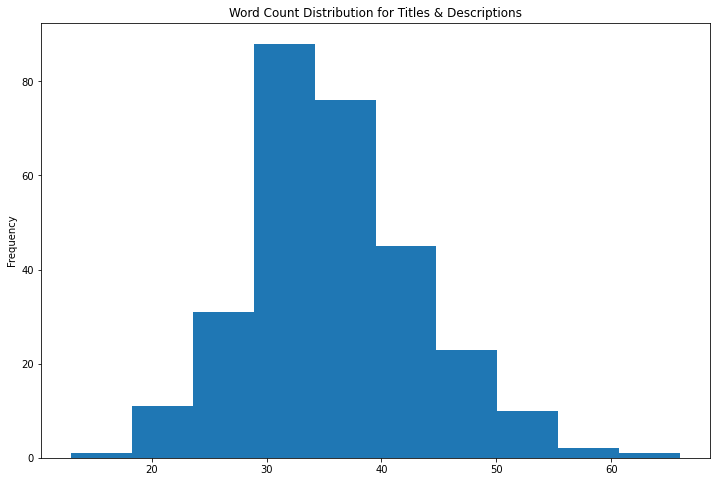

In [ ]:
# Calculating the word count for Newspaper Headlines articles titles and descriptions
df['word_count'] = df['Together'].apply(lambda x: len(str(x).split()))# Plotting the word count
word_count = df['word_count'].plot(
    kind='hist',
    bins = 10,
    figsize = (12,8),
    title ='Word Count Distribution for Titles & Descriptions')
print("Figure 7 Word count distribution plot")

In [ ]:
print("The shortest title & description contains", min(df['word_count']), 'words')
print("The longest title & description contains", max(df['word_count']), 'words')
print("The average title & description contains %5.0f" %(sum(df['word_count'])/len(df['word_count'])), 'words')

The shortest title & description contains 13 words
The longest title & description contains 66 words
The average title & description contains    36 words


Figure 8 Distribution Articles by Paper


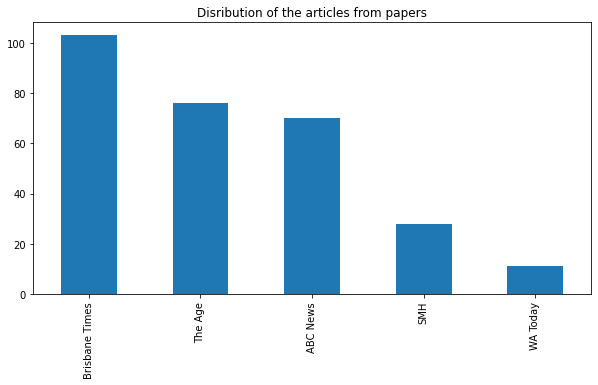

In [ ]:
# Distribution of articles from various newspapers
dist_plot = df['Paper'].value_counts().plot(x = 'date', y ='count', kind = 'bar', title = "Disribution of the articles from papers", figsize = (10,5))
print("Figure 8 Distribution Articles by Paper")


Figure 9 Distribution Articles by Section


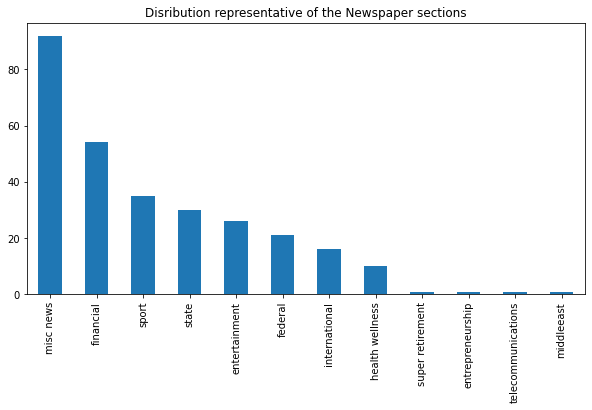

In [ ]:
## Distribution of news categories 
dist_plot = df['Section'].value_counts().plot(x = 'date', y ='count', kind = 'bar', title = "Disribution representative of the Newspaper sections", figsize = (10,5))
print("Figure 9 Distribution Articles by Section")

A bigram (Figure 10)  and trigram (Figure 11) were produced exploring the dataset prior to the application of stop words, to understand what the most common two and three word combinations were, unsurprisingly references to the new covid variant, the diplomatic boycott of the winter Olympics as current big news items, along with the Ashes cricket series that has commenced.

Figure 10 Bigram showing most frequent two word terms


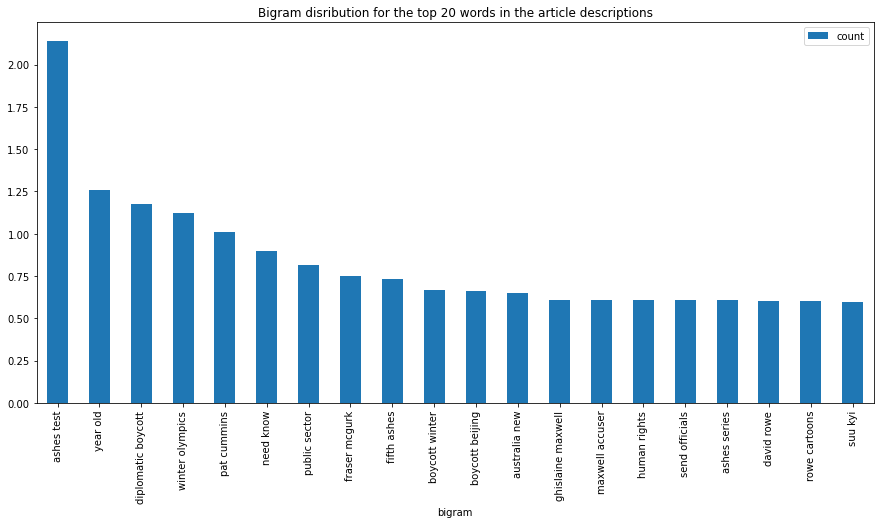

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Together'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the article descriptions", figsize = (15,7), )
print("Figure 10 Bigram showing most frequent two word terms")


Figure 11 Trigram showing the most comment three word phrases


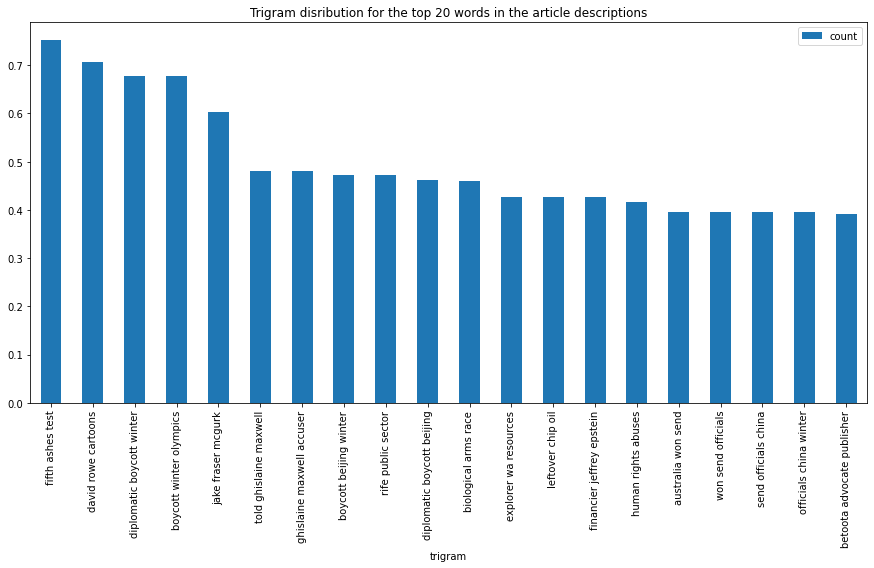

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Together'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the bigram distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the article descriptions", figsize = (15,7), )
print ("Figure 11 Trigram showing the most comment three word phrases")

Figure 12 is the word cloud produced showing the most frequently appearing words, whilst Figure 13 is a plot showing the frequency distribution of words, as expected, words such as “the” and “to” which will be removed prior to NLP tasks being undertaken in future sections appear as the most common words in the corpus.

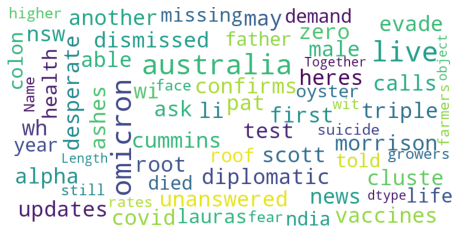

Figure 12 Wordcloud of the most frequent words


In [ ]:
# Word cloud
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

wordcloud = WordCloud( max_font_size = 50, width = 800, height = 400, background_color = 'white', max_words = 1000
                      ).generate(str(df['Together']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print("Figure 12 Wordcloud of the most frequent words")

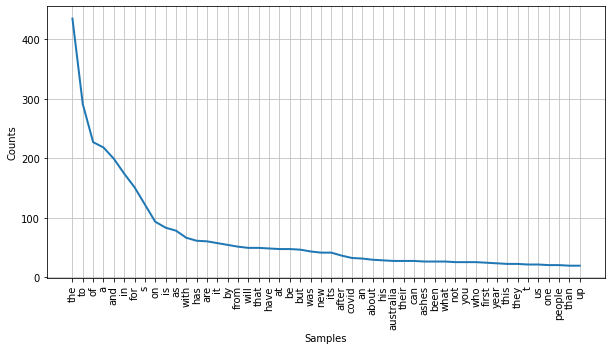

In [ ]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_titles)
Freq_dist_nltk.plot(50, cumulative=False)
